# ***TITANIC DATASET ASSESSMENT :-***

# **Review of Student's test code provided on my GitHub** - 
**I have thoroughly analyzed the line of codes provided to me on my github. What I figured out was the process to solve the problem choosen by particular student for a given problem statement was not systematic. Some of the flaws are as follows**- 

**(i)** Displaying Unstructured and Incomplete Steps, rushing towards another step and avoiding better view of dataframe and graph. Because it's very important to have a clarity of attributes given in dataset before data cleaning and analysing.

**(ii)** Use of unnecessary graphs inspite of very important attributes relations present in the dataset which can be reflected by the use of graphs.

**(iii)** Choosing wrong model like Linear regression given the problem statement of dataset which is binary classifcation i.e., passenger survived or not.

**So there are better ways to approach the problem and I had mentioned my approach in details with all the highly relevant graphs and results. The steps I follow are -**

***Data Downloading - Python Library Import - Data Visualisation - Data Analysis - Train Test Split - Model Creation***

# **Comparing Results of my code with given Student code :**

**Student Results:** 

Linear Regression: Accuracy =   -0.0009980

Logistic Regression:  Accuracy =  0.6158, AUC= 0.500000 , F score = 0.00

**My Results:**

Logistic Regression: Accuracy = 0.821, AUC = 0.811, F score = 0.780 

SVM Classifier: Accuracy = 0.620, AUC = 0.556, F score = 0.227 

KNN Classifier: Accuracy = 0.659, AUC = 0.634, F score = 0.541 

Decision Tree Classifier: Accuracy = 0.782, AUC = 0.777, F score = 0.745

Random Forest Classifier: Accuracy = 0.821 ,AUC = 0.813, F score = 0.783

**It's clearly visible that results acheived by my approach and code is better, for example in logistic regression student's accuracy is 61.58% and my accuracy is 82.1%.** 

# **Step 1: Downloading Titanic DataSet from Kaggle to Goggle Colab** 
**I have used the dataset through provided link:**  
# https://www.kaggle.com/competitions/titanic/overview


In [1]:
# install kaggle
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle.json': b'{"username":"pranshu9","key":"26101316a449197bb96373fd96e0ddef"}'}

In [3]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04           6179        198  1.0              
kaggleashwin/population-dataset                                World Population by Countries Dataset (1960-2021)    69KB  2022-08-31 05:30:26           1648         71  1.0              
iamsouravbanerjee/house-rent-prediction-dataset                House Rent Prediction Dataset                        82KB  2022-08-20 13:49:03          12171        309  1.0              
pantanjali/unemployment-dataset                                Un

In [7]:
!kaggle competitions download -c titanic # required dataset

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: gender_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


# **Step 2: Importing Libraries & displaying Dataset in DataFrame**

In [9]:
import pandas as pd #data analysis toolkit
import numpy as np #performs mathematical operations
import matplotlib.pyplot as plt #visualization package
import seaborn as sns #data visualization and EDA

In [10]:
df_train = pd.read_csv('train.csv') #read training data csv file

In [11]:
df_train.head() #print top 5 rows of data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df_train.tail() #print bottom 5 rows of data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# **Step 3: Data Visualization ( as we can see in the dataframe their are 12 attributes, so it's better to first visualize the relation between them for clarity )**

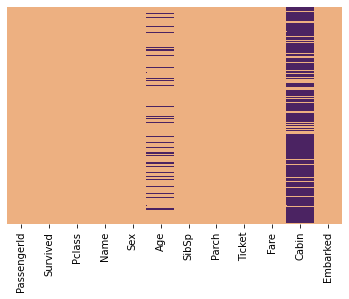

In [13]:
#shows presence of null value in attributes of dataframe
sns.heatmap(df_train.isnull(), yticklabels= False, cbar= False, cmap='flare')

#clearly visible from the heatmap that attributes like age & cabin has most null values

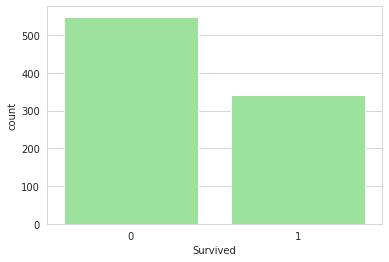

In [14]:
#plots the number of survived & not survived passengers
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df_train, color='lightgreen')

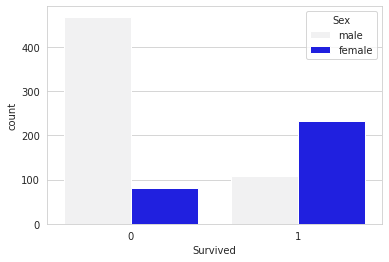

In [15]:
#plots survived & not survived passengers in terms of sex
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=df_train, color='blue')

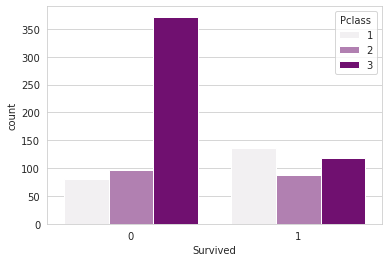

In [16]:
##plots survived & not survived passengers in terms of Passenger Class
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=df_train, color='purple')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


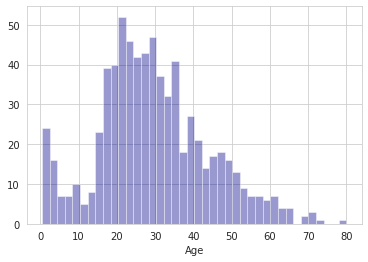

In [17]:
#plots number of passenger in specific age bracket
sns.distplot(df_train['Age'].dropna(), kde=False,bins=40, color='darkblue')

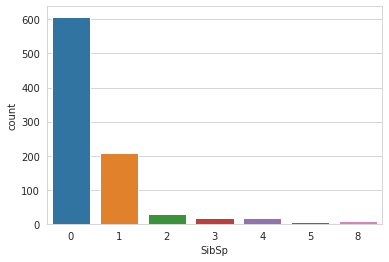

In [18]:
#plots number of passenger having siblings or spouse
sns.countplot(x='SibSp', data=df_train)

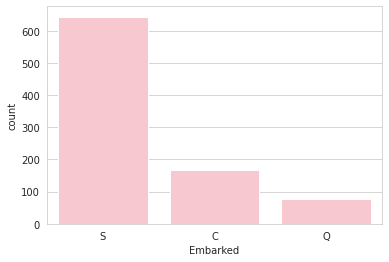

In [19]:
#plots number of passengers with different kind of embarked
sns.countplot(x='Embarked', data=df_train, color='pink')

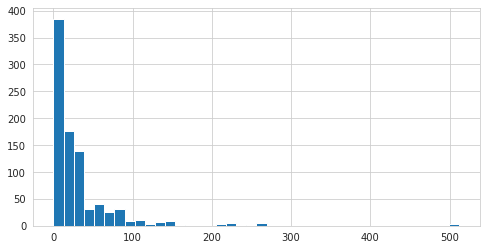

In [20]:
#plots differnt fare 
df_train['Fare'].hist(bins=40, figsize=(8,4))

# **Step 4: Data Analysis ( replacing null values of attributes, droping unnecessary attributes, converting categorical attributes to numerical )**

In [21]:
#show total number of null values in different attributes
df_train.isnull().sum()

#it's clearly visible that age & cabin attributes have lots of null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
#replace null value of age with it's mean
df_train['Age']= df_train['Age'].fillna(df_train['Age'].mean())

In [23]:
#drop cabin attributes because it has too many null values
df_train.drop(['Cabin'], axis=1, inplace=True)

In [24]:
#drop unnecessary attributes 
df_train.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [25]:
#dataframe after cleaning and analysis
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


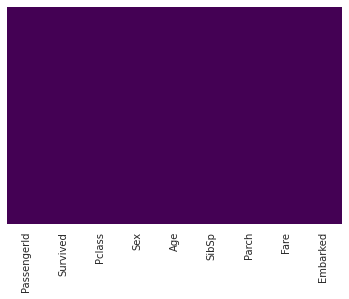

In [26]:
#heatmap of dataframe showing all required attributes with no null values
sns.heatmap(df_train.isnull(), yticklabels= False, cbar= False, cmap='viridis')

In [27]:
#show complete information of dataframe
df_train.info()

#it's clearly visible that their are some categorical attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [28]:
#convert categorical attributes of dataframe to numerical attributes
from sklearn.preprocessing import LabelEncoder
cols=['Sex', 'Embarked']
le= LabelEncoder()
for col in cols:
  df_train[col]=le.fit_transform(df_train[col])

**Final DataFrame (consist of Survived Attributes as dependent features & remaining attributes as independent features)**

In [29]:
#final dataframe
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [30]:
#drop dependent features
df_train.drop(['Survived'], axis=1).head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2


# **Step 5: Train-Test Split (80-20 split)**

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df_train.drop(['Survived'], axis=1), 
                                                   df_train['Survived'], test_size=0.20, random_state=40) 

# **Step 6: Model Creation - Logistic Regression, Support Vecort Classifier, K Nearest Neighbour, Decision Tree , Random Forest Classifier**

**Logistic Regression -** 

In [ ]:
from sklearn.linear_model import LogisticRegression 
logmodel= LogisticRegression()
logmodel.fit(X_train,y_train)

In [33]:
predictions =logmodel.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix
accuracy= confusion_matrix(y_test, predictions)
accuracy

array([[90, 13],
       [19, 57]])

In [35]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, predictions)
accuracy

0.8212290502793296

AUC: 0.811893
F score: 0.780822


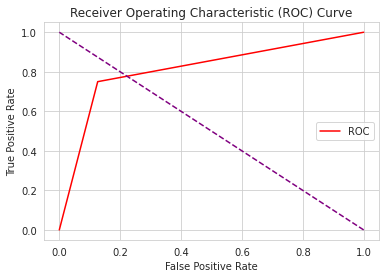

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
auc = roc_auc_score(y_test,predictions)
print('AUC: %f' %auc)

fpr, tpr = roc_curve(y_test,predictions)[0:2]
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([1,0],[0,1], color='purple', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
fscore=f1_score(y_test,predictions)
print('F score: %f' %fscore)
plt.legend()
plt.show()

**Support Vector Classifier-**

In [37]:
from sklearn import svm
model= svm.SVC()
model.fit(X_train,y_train)

SVC()

In [38]:
predictions =model.predict(X_test)

In [39]:
accuracy= accuracy_score(y_test, predictions)
accuracy

0.6201117318435754

AUC: 0.556081
F score: 0.227273


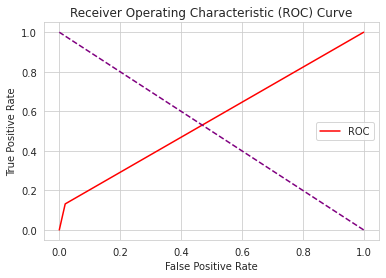

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
auc = roc_auc_score(y_test,predictions)
print('AUC: %f' %auc)

fpr, tpr = roc_curve(y_test,predictions)[0:2]
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([1,0],[0,1], color='purple', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
fscore=f1_score(y_test,predictions)
print('F score: %f' %fscore)
plt.legend()
plt.show()

**K Nearest Neighbour Classifier-**

In [41]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier()

In [42]:
predictions =model.predict(X_test)

In [43]:
accuracy= accuracy_score(y_test, predictions)
accuracy

0.659217877094972

AUC: 0.634900
F score: 0.541353


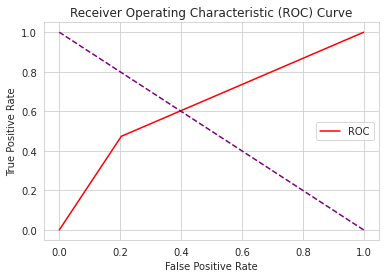

In [44]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
auc = roc_auc_score(y_test,predictions)
print('AUC: %f' %auc)

fpr, tpr = roc_curve(y_test,predictions)[0:2]
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([1,0],[0,1], color='purple', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
fscore=f1_score(y_test,predictions)
print('F score: %f' %fscore)
plt.legend()
plt.show()

**Decision Tree Clasifier-**

In [45]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
predictions =model.predict(X_test)

In [47]:
accuracy= accuracy_score(y_test, predictions)
accuracy

0.7821229050279329

AUC: 0.777913
F score: 0.745098


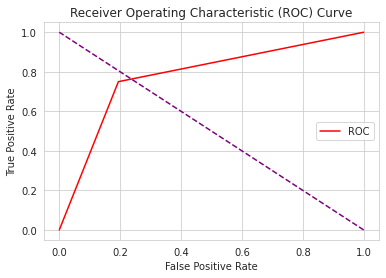

In [48]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
auc = roc_auc_score(y_test,predictions)
print('AUC: %f' %auc)

fpr, tpr = roc_curve(y_test,predictions)[0:2]
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([1,0],[0,1], color='purple', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
fscore=f1_score(y_test,predictions)
print('F score: %f' %fscore)
plt.legend()
plt.show()

**Random Forest Classifier-**

In [49]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
predictions =model.predict(X_test)

In [51]:
accuracy= accuracy_score(y_test, predictions)
accuracy

0.8212290502793296

AUC: 0.813618
F score: 0.783784


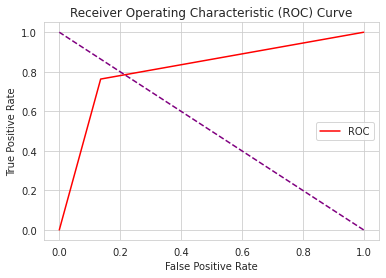

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
auc = roc_auc_score(y_test,predictions)
print('AUC: %f' %auc)

fpr, tpr = roc_curve(y_test,predictions)[0:2]
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([1,0],[0,1], color='purple', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
fscore=f1_score(y_test,predictions)
print('F score: %f' %fscore)
plt.legend()
plt.show()